## We’ll create four random clusters using make_blobs in Python’s sci-kit learn library

In [1]:
# import statements
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# create blobs
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)
# create np array for data points
points = data[0]


### the clusters are shown by colors

(-15.0, 15.0)

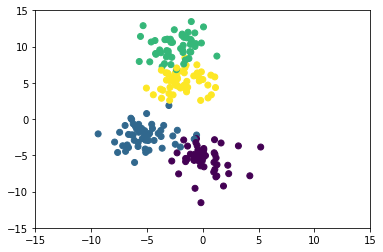

In [3]:
# create scatter plot
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
plt.xlim(-15,15)
plt.ylim(-15,15)

## Part 1: Run K Means Algoritm and Observe Results

In [4]:
# import KMeans
from sklearn.cluster import KMeans

# create kmeans object
kmeans = KMeans(n_clusters=3)
# fit kmeans object to data
kmeans.fit(points)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(points)

[[ 0.05161133 -5.35489826]
 [-2.13583883  7.57989854]
 [-5.50955539 -2.25816149]]


(-15.0, 15.0)

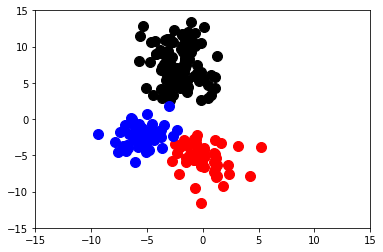

In [5]:
# print points in each cluster with a unique color
plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100, c='red')
plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100, c='black')
plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=100, c='blue')


plt.xlim(-15,15)
plt.ylim(-15,15)

## Question 1: What did you observe when K = 3? 

In [6]:
print("Answer: When K-means is run with K=3, the two of the three resulting clusters accurately reflect two of the original data blobs. The final cluster contains the data points from a combination of two data blobs. This algorithm represents the data blobs well, but K=3 limits the number of clusters that can be created.")

Answer: When K-means is run with K=3, the two of the three resulting clusters accurately reflect two of the original data blobs. The final cluster contains the data points from a combination of two data blobs. This algorithm represents the data blobs well, but K=3 limits the number of clusters that can be created.


## Please try the K-Means clustering process and visualization with K=4. What did you observe for K=4?

[[ 0.05161133 -5.35489826]
 [-2.40167949 10.17352695]
 [-1.92101646  5.21673484]
 [-5.56465793 -2.34988939]]


(-15.0, 15.0)

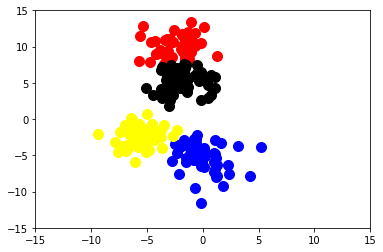

In [7]:
# import KMeans
from sklearn.cluster import KMeans

# create kmeans object
kmeans = KMeans(n_clusters=4)
# fit kmeans object to data
kmeans.fit(points)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(points)

# print points in each cluster with a unique color
plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100, c='red')
plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100, c='black')
plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=100, c='blue')
plt.scatter(points[y_km ==3,0], points[y_km == 3,1], s=100, c='yellow')


plt.xlim(-15,15)
plt.ylim(-15,15)

In [8]:
print("Answer: K-means represents the original data blobs even better when K=4. Each cluster accurately reflects one of the four original data blobs.")

Answer: K-means represents the original data blobs even better when K=4. Each cluster accurately reflects one of the four original data blobs.


## Part 2: Run Hierarchical Clustering with MIN (single-link) and MAX (complete-link), and observe results

### Part 2.1: Run Hierarchical Clustering with MIN (single-link), and visualize results similar to above

Found 4 total clusters!


(-15.0, 15.0)

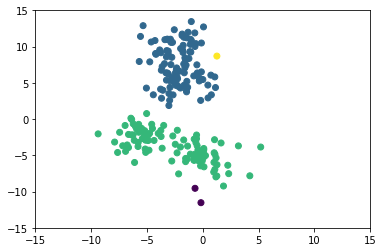

In [9]:
## Write your codes below to call hierarchical clustering with MIN, and visualize results
from sklearn.cluster import AgglomerativeClustering

# run the AgglomerativeClustering function, with paramters: n_clusters=4, linkage="single", affinity="euclidean"
minClustering = AgglomerativeClustering(n_clusters=4, linkage="single", affinity="euclidean")
minLabels = minClustering.fit_predict(points)
print("Found " + str(max(minLabels) + 1) + " total clusters!")

plt.scatter(points[:,0], points[:,1], c=minLabels, cmap='viridis')
plt.xlim(-15,15)
plt.ylim(-15,15)

### Question: 
what is the difference between Hierarchical clustering with MIN and K-means? How does hierarchical clustering with MIN handle outliers? Do you have some potential fix to address outliers?

In [10]:
print("Answer: K-means identifies clusters by determining centroids and assigning data points to the closest centroid, while hierarchical clustering combines the closest clusters together until the desired number of clusters are reached. Hierarchical clustering with MIN does not necessarily handle outliers well because outlying points could become their own independent clusters while the larger clusters continue to combine together. This can be mitigated by using MAX instead of MIN or by creating more clusters and discarding clusters that only include singular or a small amount of data points.")

Answer: K-means identifies clusters by determining centroids and assigning data points to the closest centroid, while hierarchical clustering combines the closest clusters together until the desired number of clusters are reached. Hierarchical clustering with MIN does not necessarily handle outliers well because outlying points could become their own independent clusters while the larger clusters continue to combine together. This can be mitigated by using MAX instead of MIN or by creating more clusters and discarding clusters that only include singular or a small amount of data points.


### Part 2.2: Run Hierarchical Clustering with MAX (complete-link), and visualize results similar to above

Found 4 total clusters!


(-15.0, 15.0)

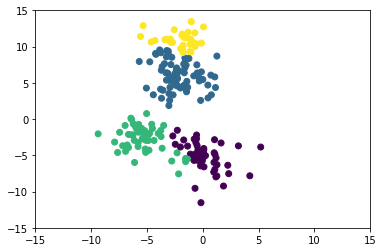

In [11]:
## Write your codes below to call hierarchical clustering with MAX, and visualize results
## You may need to tune the parameters to try to find the four clusters as much as possible

#run the same AgglomerativeClustering function, with parameters: n_clusters=4, linkage="complete", affinity="euclidean"
maxClustering = AgglomerativeClustering(n_clusters=4, linkage="complete", affinity="euclidean")
maxLabels = maxClustering.fit_predict(points)
print("Found " + str(max(maxLabels) + 1) + " total clusters!")

plt.scatter(points[:,0], points[:,1], c=maxLabels, cmap='viridis')
plt.xlim(-15,15)
plt.ylim(-15,15)

### Question: 
Between Hierarchical clustering with MIN and with MAX, which behaves more similar to K-means?

In [12]:
print("Answer: Hierarchical clustering with MAX behaves more like K-means. The resulting clusters from this algorithm accurately reflect both the output of K-means with K=4 and the original four data blobs.")

Answer: Hierarchical clustering with MAX behaves more like K-means. The resulting clusters from this algorithm accurately reflect both the output of K-means with K=4 and the original four data blobs.


## Part 3: Run DB-Scan and observe results

Found 4 total clusters!
49 points were dropped as noise.


(-15.0, 15.0)

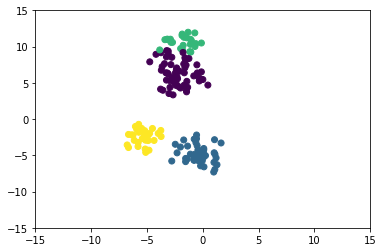

In [13]:
## Write your codes below to call DB-Scan and visualize results
from sklearn.cluster import DBSCAN

#Use the DBSCAN function with parameters: eps=2, min_samples=28, metric="euclidean" 
dbScan = DBSCAN(eps=2, min_samples=28, metric="euclidean")
dbScanLabels = dbScan.fit_predict(points)

print("Found " + str(max(dbScanLabels)+1) + " total clusters!")
print(str(len(points) - len(dbScanLabels[dbScanLabels != -1])) + " points were dropped as noise.")
plt.scatter(points[dbScanLabels != -1,0], points[dbScanLabels != -1,1], c=dbScanLabels[dbScanLabels != -1], cmap='viridis')
plt.xlim(-15,15)
plt.ylim(-15,15)

### Question: 
what did you observe about this method?

In [14]:
print("Answer: The shape of the clusters resulting from DBSCAN relfect the shape of the original four data blobs. However, the clusters resulting from this algorithm have much more clearly defined boundaries with the outliers removed.")

Answer: 
